In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter, FuncFormatter

df = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\5_Education_Income\working sheet.csv')
df['Year']=pd.to_datetime(df['Year']).dt.year
# Yearly data, so just extract year from date

incomes= {'0': '0',
          '$5,000 to $9,999': '5k-10k',
          '$10,000 to $14,999':'10k-15k',
          '$15,000 to $24,999' :'15k-25k',
          '$25,000 to $34,999' :'25k-35k',
          '$35,000 to $49,999' :'35k-50k',
          '$50,000 to $74,999' :'50k-75k',
          '$75,000 and over' :'75k+'}

#Replace them for better visualization
df['income']=df['Personal Income'].replace(incomes)

#drop the row where no population
df = df.dropna()


sorted =['0', '5k-10k', '10k-15k', '15k-25k', '25k-35k', '35k-50k', '50k-75k','75k+']
deg_sorted= ['No high school diploma','High school or equivalent', 
             'Some college, less than 4-yr degree',"Bachelor's degree or higher"]
sns.set_style('ticks')

In [2]:
df

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count,avg_income,income
0,2008,00 to 17,Male,No high school diploma,0,650889.0,0.0,0
1,2008,00 to 17,Male,No high school diploma,"$5,000 to $9,999",30152.0,7499.5,5k-10k
2,2008,00 to 17,Male,No high school diploma,"$10,000 to $14,999",7092.0,12499.5,10k-15k
3,2008,00 to 17,Male,No high school diploma,"$15,000 to $24,999",3974.0,19999.5,15k-25k
4,2008,00 to 17,Male,No high school diploma,"$25,000 to $34,999",2606.0,29999.5,25k-35k
...,...,...,...,...,...,...,...,...
1041,2014,65 to 80+,Female,Bachelor's degree or higher,"$15,000 to $24,999",82988.0,19999.5,15k-25k
1042,2014,65 to 80+,Female,Bachelor's degree or higher,"$25,000 to $34,999",59607.0,29999.5,25k-35k
1043,2014,65 to 80+,Female,Bachelor's degree or higher,"$35,000 to $49,999",113584.0,42499.5,35k-50k
1044,2014,65 to 80+,Female,Bachelor's degree or higher,"$50,000 to $74,999",97657.0,62499.5,50k-75k


### Age and income range

In [63]:
df_age_income = df.pivot_table(index='Age', columns='income', values='Population Count', aggfunc='sum').reindex(sorted, axis=1).T
df_age_income

Age,00 to 17,18 to 64,65 to 80+
income,,,
0,9102276.0,22426961.0,1631939.0
5k-10k,407724.0,12305177.0,4209341.0
10k-15k,144619.0,13483186.0,5232820.0
15k-25k,92440.0,23361309.0,5989490.0
25k-35k,17286.0,17951775.0,3261845.0
35k-50k,12235.0,19565441.0,2812212.0
50k-75k,6676.0,19650159.0,2669480.0
75k+,4363.0,23062887.0,2965326.0


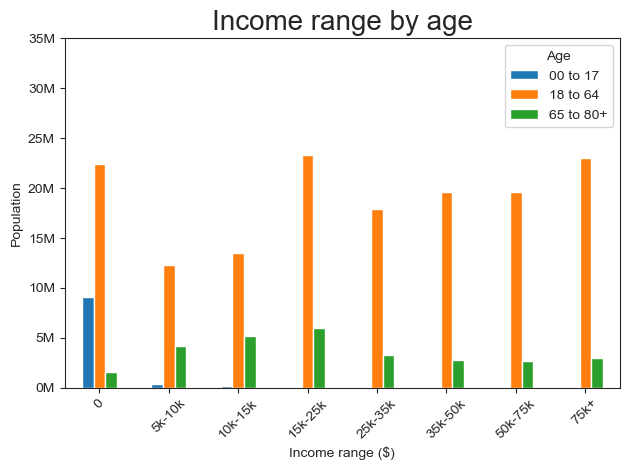

In [132]:
df_age_income.plot(kind='bar')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000000):.0f}M'))
plt.ylabel('Population')
plt.legend(title='Age')
plt.title('Income range by age', fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Income range ($)')
plt.tight_layout()
plt.ylim(0,35000000)
plt.show()

### Age and Educational Attainment

In [72]:
df_age_edu = df.pivot_table(index='Age', columns='Educational Attainment', values='Population Count', aggfunc='sum').reindex(deg_sorted, axis=1).T
df_age_edu

Age,00 to 17,18 to 64,65 to 80+
Educational Attainment,,,
No high school diploma,9566523.0,25353234.0,5749114.0
High school or equivalent,114881.0,35577621.0,7250424.0
"Some college, less than 4-yr degree",91542.0,44843283.0,7202669.0
Bachelor's degree or higher,14673.0,46032757.0,8570246.0


In [82]:
df_age_edu.index

Index(['No high school diploma', 'High school or equivalent',
       'Some college, less than 4-yr degree', 'Bachelor's degree or higher'],
      dtype='object', name='Educational Attainment')

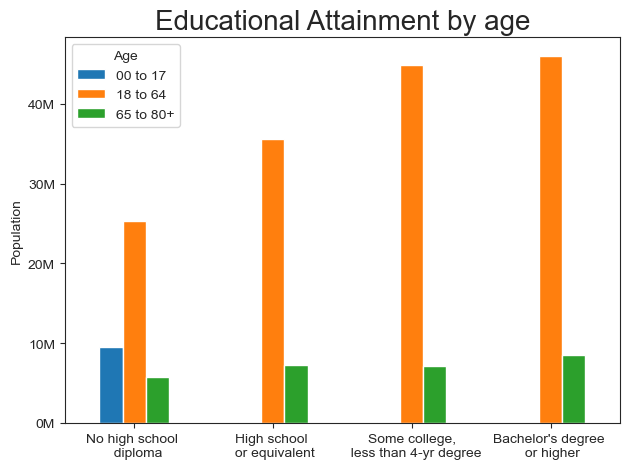

In [133]:
df_age_edu.plot(kind='bar')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000000):.0f}M'))
plt.ylabel('Population')
plt.legend(title='Age')
plt.title('Educational Attainment by age', fontsize=20)
#plt.xticks(rotation=45, labels=)
plt.gca().set_xticklabels(["No high school \n  diploma", 
                    'High school \n or equivalent', 
                    'Some college,\n  less than 4-yr degree', 
                    "Bachelor's degree \n or higher"], 
                   rotation=0, ha="center")
plt.xlabel('')
plt.tight_layout()

plt.show()


- Age under 18 consist No high school diploma and $0 income, it seems fair to remove 00 to 17 age category.

In [93]:
df_1880= df[(df['Age']=='65 to 80+')|( df['Age']=='18 to 64')]
df_1880

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count,avg_income,income
19,2008,18 to 64,Male,No high school diploma,0,261172.0,0.0,0
20,2008,18 to 64,Male,No high school diploma,"$5,000 to $9,999",163263.0,7499.5,5k-10k
21,2008,18 to 64,Male,No high school diploma,"$10,000 to $14,999",317119.0,12499.5,10k-15k
22,2008,18 to 64,Male,No high school diploma,"$15,000 to $24,999",573769.0,19999.5,15k-25k
23,2008,18 to 64,Male,No high school diploma,"$25,000 to $34,999",333713.0,29999.5,25k-35k
...,...,...,...,...,...,...,...,...
1041,2014,65 to 80+,Female,Bachelor's degree or higher,"$15,000 to $24,999",82988.0,19999.5,15k-25k
1042,2014,65 to 80+,Female,Bachelor's degree or higher,"$25,000 to $34,999",59607.0,29999.5,25k-35k
1043,2014,65 to 80+,Female,Bachelor's degree or higher,"$35,000 to $49,999",113584.0,42499.5,35k-50k
1044,2014,65 to 80+,Female,Bachelor's degree or higher,"$50,000 to $74,999",97657.0,62499.5,50k-75k


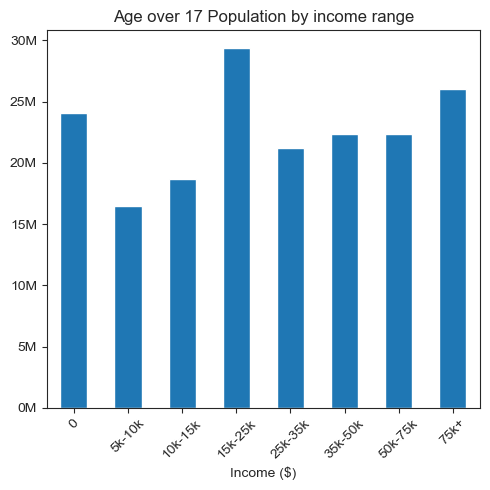

In [105]:
df_1880.groupby('income')['Population Count'].sum().to_frame().reindex(sorted).plot(kind='bar', figsize=(5,5))


plt.legend().remove()
plt.xlabel('Income ($)')
plt.title('Age over 17 Population by income range')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000000):.0f}M'))
plt.tight_layout()
plt.show()


- Income range $15k- 25k, $75K+, $0 are the top 3 distribution 

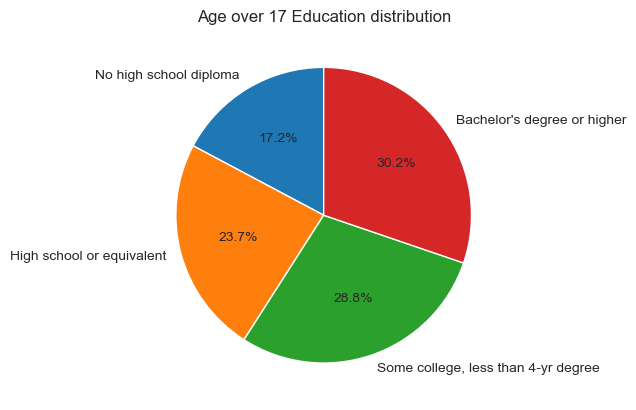

In [121]:
df_1880_pie = df_1880.groupby('Educational Attainment')['Population Count'].sum().to_frame().reindex(deg_sorted)
plt.gca().pie(df_1880_pie['Population Count'],autopct='%1.1f%%', startangle=90, labels=df_1880_pie.index)
plt.title("Age over 17 Education distribution")
plt.show()

- More than 80% of population has high educational attainment

In [114]:
df_1880_pivot = df_1880.pivot_table(
    values='Population Count',index='Educational Attainment', columns='income', aggfunc='sum'
                                      ).reindex(deg_sorted).reindex(sorted, axis=1)


Text(0.5, 0, 'Income ($)')

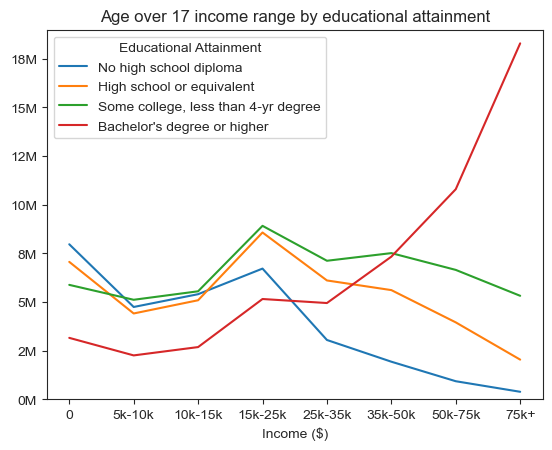

In [ ]:
df_1880_pivot.T.plot()
plt.title('Age over 17 income range by educational attainment')
plt.ylim(0,19000000)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000000):.0f}M'))
plt.xlabel('Income ($)')
plt.show()

- Not only Bachelor's degree or higher group has most population in $75k+, 

  but also less distribution in $0 income range.